# <center> Self Organizing Maps (SOM) </center>

Pour ce notebook on va utiliser la bibliothèque minisom. Pour plus d'information sur la bibliothèque, référez-vous à la [page github de minisom](https://github.com/JustGlowing/minisom). Pour installer minisom, exécuter depuis un terminal la commande : 

   Les Self Organizing Maps (SOM), ou cartes auto-adaptatives en français, sont des réseaux de neurones artificiels permettant la génération d'une représentation discrétisée et à faible dimensions (en général 2D) du dataset d'entrée continu et de dimension élevée. De part leur nature même, les SOMs sont donc généralement utilisées pour obtenir une **réduction de dimension**, **une visualisation 2D de la donnée**, ou un outil de **classification**. 


Le premier à introduire le concept des SOMs en 1984 est le professeur de l'académie de Finlande Teuvo Kohonen. On les appelle donc souvent "cartes de Kohonen" ou "réseaux de Kohonen". 

Son concept est inspiré d'études neurobiologiques montrant que les stimulis de natures différentes sont traités par des zones spécifiques différentes du cortex cérébral. L'existence de ces zones specifiques, ou spécialisées, et leur organisation les unes par rapport aux autres permettent des mises à contribution plus rapides (connections synaptiques plus courtes) des neurones voisins, donc très similaires. On parle d'organisation en carte topologique.

Les SOMs partent donc de l'idée d'ordonner spatiallement, à la manière d'une carte topologique, les neurones d'une couche. Ils sont fondés sur ces deux principes : chaque individu d'entrée est pris en charge par une zone précise de la carte en fonction de ses caractéristiques, et cette zone est représentée par un vecteur référent dont les caractéristiques sont proches de celles de ses voisins.

Dans le cadre du cours on a principalement vu des réseaux de neurones en apprentissage suppervisé, donc dans un contexte où l'on connait le résultat à obtenir et on entraine le réseau à reproduire ce résultat. La SOM se distingue de ces résaux car il est fondé sur un apprentissage non supervisé, le réseau évolue, s'adapte, créé sa propre classification sans intervention extérieure. Lors de l'implémentation d'un SOM, on suppose donc que l'appartenance d'un individu à une classe peut être largement définie par certaines features communes avec d'autres individus, et que le réseau sera capable de distinguer ces features d'intérêt des autres features secondaires. 

Il y a beaucoup de sources différentes décrivant très bien les réseaux de Kohonen et leur utilisation. Les principales sources utilisées pour ce notebook sont : 
- la [page wikipédia](https://en.wikipedia.org/wiki/Self-organizing_map) (explication)
- une [présentation de John A. Bullinaria](https://www.cs.bham.ac.uk/~jxb/NN/l16.pdf) (explications)
- une [présentation de Ricco RAKOTOMALALA](https://eric.univ-lyon2.fr/~ricco/cours/slides/en/kohonen_som.pdf) (explication et exemple d'application visualisation & clustering)
- les [examples de la librairie minisom](https://github.com/JustGlowing/minisom/tree/master/examples) (nombreux exemples d'applications)
- la [vidéo](https://www.youtube.com/watch?v=0qtvb_Nx2tA) de la chaîne YouTube *Art of Vizualisation* 


## 1 - Présentation de l'algorithme
### Carte de Kohonen

Les trois représentations suivantes des cartes de Kohonen sont classiques. La première est une carte 1D, la deuxième 2D rectangulaire et la troisième 2D hexagonale.

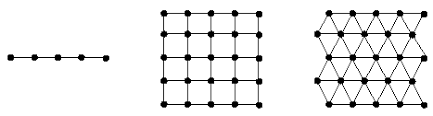

Chaque point est un neurone, il correspond à une "zone" de la carte topologique. À chaque zone est associé un vecteur référent appelé **codebook**, qui contient les features caractéristiques du neurone. Chaque individu $x$ du dataset d'étude pourra alors être rangé dans la carte de Kohonen en l'associant à un neurone spécifique : celui dont les features sont les plus proches de ceux de l'individu $x$.

Le réseau est schématisé ci-dessous. Chaque neurone de la carte est relié à tous les features de l'input. 

L'**input** est un vecteur de taille $n$ ($n$ features) correspondant à un individu du dataset. 

La **carte de Kohonen** est d'une taille définie par l'utilisateur. Chacun des neurones de la carte est relié à tous les features du vecteur d'entrée.

L'**output** est le codebook de chaque neurone de la carte. On peut alors associer à chaque neurone tous les individus du dataset qui lui sont associés. 

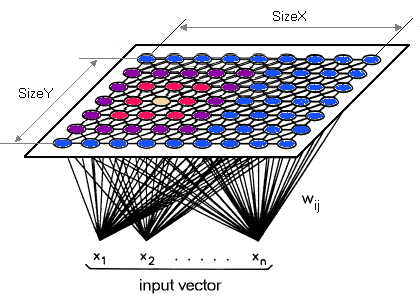

### Création de la carte de Kohonen

Avant de pouvoir utiliser la carte de Kohonen il faut la générer au plus proche du dataset par une méthode d'auto-adaptation. 

Le processus est fondé sur les principes/étapes suivantes : 
> 1 - Initialisation : les Codebooks de chaque neurone sont initialisés (généralement de façon aléatoire). <br>
> 2 - Sampling : un individu est choisi (souvent aléatoirement) dans l'ensemble du dataset.  
> 3 - Competition - Matching : le neurone dont les features sont les plus proches de celles de l'individu est sélectionné. On l'appelle le neurone gagnant. On utilise souvent une distance euclidienne pour définir la notion de proximité. <br>
> 4 - Cooperation : Identification des neurones voisins qui sont également touchés par la mise à jour des poids. <br>
> 5 - Adaptation : Mise à jour des poids des neurones concernés. <br>
> 6 - Continuation : Le processus est répété à partir du point 2 jusqu'à ce que la carte ne soit plus affectée par l'étape d'adaption (5) ou qu'on atteint le nombre maximum d'itérations défini par l'utilisateur. <br>

Les 6 points précédents sont les éléments les plus important à retenir pour comprendre les SOMs. <br> 
Le schéma suivant résume ces étapes de création de la carte de Kohonen :

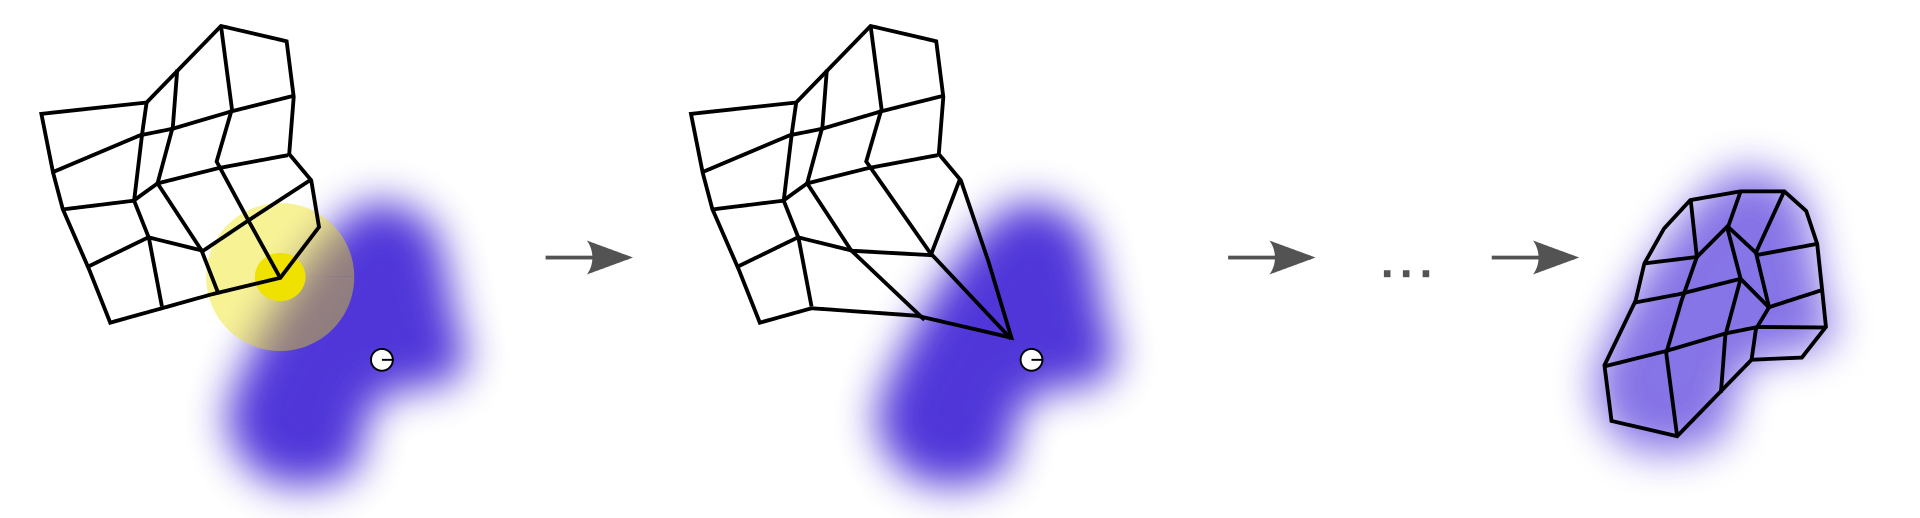
*Image Source : https://en.wikipedia.org/wiki/Self-organizing_map*

Le nuage bleu représente le dataset d'étude, le quadriaillage est la carte de Kohonen dont les poids sont attribués de façon aléatoire lors de l'initialisation. Lors de la première étape (schéma de gauche), un individu du dataset d'entrée est aléatoirement (en général) choisi ; il est représenté en blanc ici. Le neurone le plus proche de ce point en terme de features est souligné en jaune ; c'est donc le seul neurone activé à cette étape. Ses poids et les poids de ses voisins sont alors mis à jours pour mieux correspondre aux features de l'individu du dataset (étape intermédiaire). L'opération est répétée jusqu'à ce que la carte ne bouge plus ou que l'on atteint le nombre maximal d'itérations. A son dernier stade la carte de Kohonen parait bien adaptée à la donnée d'entrée.

Pour la suite du notebook, l'individu du dataset d'étude choisi lors du sampling est noté $x$, le neurone gagnant (le plus proche en termes de features) est noté $I(x)$. 

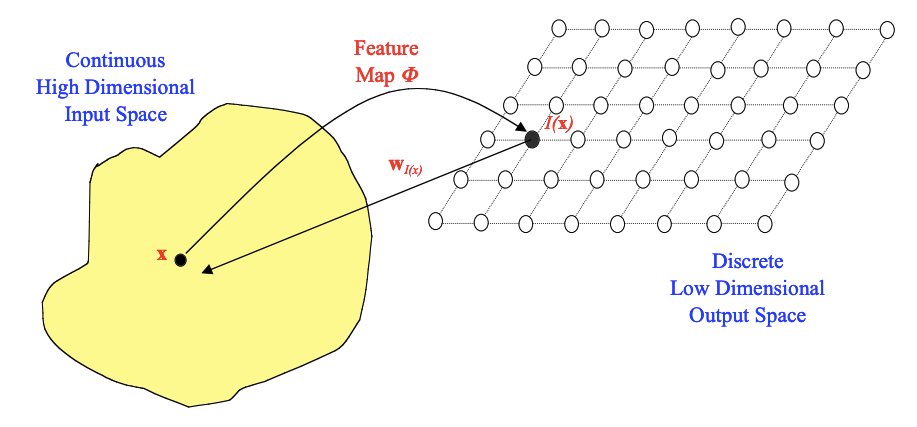
_Image source : https://www.cs.bham.ac.uk/~jxb/NN/l16.pdf_

In [ ]:
from minisom import MiniSom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
from sklearn.preprocessing import minmax_scale, scale

Le dataset utilisé pour ce premier exemple est le résultat d'une étude chimique de vins portugais. Plus d'informations sur ce dataset sont disponibles sur le site d'archives de dataset [ici](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

On charge le dataset :

In [ ]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 
                    header = 0, sep=';')
wine_data.head()

In [ ]:
# dataset without the 'quality' feature and with centerd ans scaled values
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
data = pd.DataFrame(scale(wine_data[feature_names]), columns=feature_names)
data.head()

##### Initialisation
Les Codebooks de chaque neurone sont initialisés (généralement de façon aléatoire).

In [ ]:
# Definition of the dimensions of the map:
x = 3
y = 3

<div class="alert alert-warning">

**Exercice 1 :**<br>
Compléter le code suivant pour définir une fonction qui retourne une carte de Kohonen avec des poids aléatoires.
</div>

In [ ]:
def rand_weights_som(x_size,y_size,dataset):
    nb_features = dataset.shape[1]
    random_seed = 1234
    rand_generator = np.random.RandomState(random_seed)


In [ ]:
# %load solutions/ex1.py

In [ ]:
som = rand_weights_som(x,y,data)

##### Sampling 
Un individu $x$ est aléatoirement sélectionné. C'est le vecteur d'entrée $x = (x_{1}, ... , x_{n})$. $n$ est donc le nombre de features du dataset d'entrée.

##### Competition - Matching

Cette étape fait toute la particularité des SOMs étant donné que les réseaux de neurones les plus classiques fonctionnent en apprentissage supervisé par une méthode de minimisation de l'erreur comme la descente de gradient. Cette étape de Compétition est celle qui matérialise l'idée que la carte se crée et s'adapte **automatiquement**. <br> <br>
Pour déterminer le neurone le plus proche du vecteur d'entrée (neurone gagnant), il est nécessaire de définir une distance. Ici, nous prenons la distance euclidienne. Ainsi, pour le $j^{ème}$ neurone de poids $w_{ij}$ :

In [ ]:
def eucl_dist(x,wj):
    return sum((xi-wij)**2 for xi, wij in zip(x,wj))

<div class="alert alert-warning">

**Exercice 2 :**<br>
Écrire une fonction ```winning_neuron``` qui prend en entrée la carte SOM (```som``` ) et le vecteur d'input $x$ (```input_vect```) et retourne l'indice du neurone gagnant.
</div>

In [ ]:
def winning_neuron(som, input_vect):
    return (i,j)

In [ ]:
# %load solutions/ex2.py

Testons la fonction créée :

In [ ]:
winning_neuron(som,np.array([1,2,3,4,5,6,7,8,9,10,11,12]), verbose=True)

##### Cooperation
Les codebooks (ou poids) des neurones voisins du gagnant sont également modifiés. Cette opération permet l'organisation de la carte sous forme de zones de neurones aux caractéristiques similaires. Elle illustre également le processus biologique selon lequel lorsqu'un neurone est activé, ses proches voisins (donc aux fonctions similaires) s'activent également tandis que les neurones éloignés restent inertes. Pour un neurone $j$, $I(x)$ étant l'indice du neurone gagnant, la fonction de voisinnage prend la forme :

<center>$T_{j,I(x)}=exp(\frac{-S^{2}_{j,I(x)}}{2\sigma^{2}})$ </center>

<center>avec :
  
<center>$S_{ij}$ la distance latérale entre le neurone $i$ et le neurone $j$ (ici distance euclidienne), 
    
<center>$t$ le temps (ou l'époque), 

<center>$I(x)$ l'indice du neurone gagnant,
    
<center>$\sigma$ la taille du voisinage.</center>

On peut montrer que la fonction de voisinnage $T_{j,I(x)}$ définie plus haut est adaptée aux conditions de la SOM puisqu'elle a les propriétés suivantes : elle est maximale au neurone gagnant, elle est symétrique dans toutes les directions depuis ce neurone, elle est décroissante et temps vers 0 à l'infini, et elle est invariante par translation (même voisinage pour tous les neurones gagnants). On peut toutefois choisir d'autres fonctions de voisinage, à conditions qu'elles respectent ces propriétés.

Une des propriétés importantes des SOMs est que la taille du voisinage doit diminuer avec le temps. Ainsi, au fur et à mesure de l'apprentissage, chaque étape impactera moins de neurones que la précédente. Cela permet à la carte de Kohonen de se stabiliser. Une taille de voisinage typiquement choisie suit une décroissance temporelle exponentielle :

<center>$\sigma(t)=\sigma_{0}exp(\frac{-t}{\tau_{\sigma}})$</center>
<center>avec :
  
<center>$\sigma_{0}$ et $\tau_{\sigma}$ deux hyperparamètres.

Pour implémenter $T_{j,I(x)}$ il faut définir une notion de distance latérale $S_{ij}$ entre deux neurones. Prenons ici une grille rectangulaire :

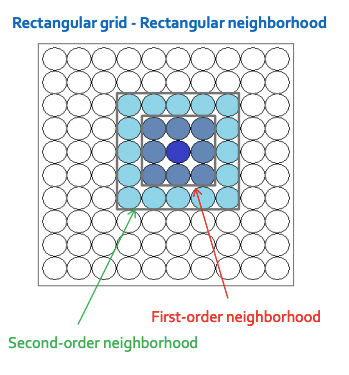
*Source : https://eric.univ-lyon2.fr/~ricco/cours/slides/en/kohonen_som.pdf*

La fonction de définition de la distance latérale $S_{i,j}$ dans ce cas là est donc : 

In [ ]:
def lateral_dist(ind_i,ind_j):
    i_x, i_y = ind_i
    j_x, j_y = ind_j
    return (max(np.abs(i_x-j_x),np.abs(i_y-j_y)))

<div class="alert alert-warning">

**Exercice 3 :**<br>
Écrire une fonction ```neighborhood``` qui définit la fonction de voisinage $T_{j,I(x)}$ en prenant en entrée l'indice d'un neurone quelconque, l'indice du neurone gagnant, l'époque $t$, et les hyperparamètres $\sigma_{0}$ et $\tau_{\sigma}$.
</div>

In [ ]:
# %load solutions/ex3.py

##### Adaptation
L'Adaptation est l'étape où la carte se réorganise. Ainsi, les poids du neurone gagnant mais aussi ceux de ses proches voisins, selon le principe de cooperation, sont mis à jours. Les poids des neurones voisins du gagnant seront moins mis à jour que ceux du neurone gagnant lui-même, par la présence de $T_{j,I(x)}$. L'équation de mise à jour des poids est :

<center> $\Delta w_{ij}=\eta(t).T_{j,I(x)}.(x_{i}-w_{ij})$ </center>

<center>avec :
 
<center>$\eta (t)$ le taux d'apprentissage.</center>
    

Il convient de prendre $\eta(t)$ décroissant avec le temps :

<center>$\eta(t)=\eta_{0}exp(\frac{-t}{\tau_{\eta}})$ </center>

<div class="alert alert-warning">

**Exercice 4 :**<br>
Écrire une fonction `update` qui prend en entrée la SOM, le vecteur d'input $x$, l'indice $j$ d'un neurone quelconque, l'indice $I(x)$ du neurone gagnant, l'epoque $t$ et les hyperparamètres $\eta_{0}$ et $\tau_{\eta}$ et met à jour les poids de la SOM. 
</div>

In [ ]:
def update_weights(som, input_vect, neuron_ind, winning_ind, epoch, eta_0, tau_eta, sigma_0, tau_sigma):

In [ ]:
# %load solutions/ex4.py

<div class="alert alert-warning">

**Exercice 5 :**<br>
Écrire une fonction qui prend en entrée le dataset et la SOM, réalise les étapes de Sampling, de Matching, de Cooperation et d'Adaptation et retourne la carte SOM mise à jour.
</div>

In [ ]:
def one_iter(data,som):
    
    return updated_som

In [ ]:
# %load solutions/ex5.py

##### Continuation
Pour que la carte s'auto-organise il faut itérer les étapes 2 à 5 un grand nombre de fois. A chaque itération, les poids du neurone gagnant et de ses voisins sont mis à jour pour ressembler d'avantage à l'input de l'itération. Généralement, un nombre adapté d'itérations est 1000.

Pour pouvoir visualiser la carte, il faut définir une fonction d'affichage de la SOM. La fonction de représentation que j'ai définie ci-dessous n'est pas idéale mais elle permet de visualiser pour chaque neurone de la carte de Kohonen le nombre d'individus du dataset dont il est le neurone le plus proche.

In [ ]:
# SOM raw representation by number of individuals that fit best with each neuron of the SOM.
import scipy.sparse as sparse
def som_display(som, dataset):
    df = dataset.copy()
    winning_times = np.zeros((som.shape[0],som.shape[1]))
    wins = []
    for ind in range(len(dataset)):
        wins.append(winning_neuron(som, dataset.iloc[ind]))
    arr = sparse.coo_matrix(wins, shape=(len(dataset),2))
    df['winner_neuron'] = arr.toarray().tolist()
    count = df['winner_neuron'].value_counts()
    print(count)

Entrainons le réseau sur plusieurs époques :

In [ ]:
max_epoch = 1000
# Hyperparameters arbitrary setting
eta_0 = 0.5
tau_eta = max_epoch/2
sigma_0 = 2.
tau_sigma = max_epoch/2
# Size definition of Kohonen Map
x = 3
y = 3
# Initialisation of map
som = rand_weights_som(x,y,data)

In [ ]:
epoch = 1
while epoch < max_epoch+1:
    #print('Epoch ', epoch , ': ')
    one_iter(data, som, epoch, eta_0, tau_eta, sigma_0, tau_sigma)
    epoch += 1
som_display(som,data)

Et voilà, tous les éléments structurants d'un réseau de Kohonen ont été codés ! Bien entendu les fonctions définies jusque là permettent de comprendre comment fonctionne un réseau de Kohonen mais elles ne sont pas représentatives des performances habituelles de tels réseaux.  <br>
D'accord, mais à quoi sert ce réseau ? Et comment représenter la carte de Kohonen de façon à ce qu'elle donne des informations sur la data ? <br>
Pour la suite du notebook, nous utiliseront le package minisom installé en début de Notebook. Les exemples des parties suivantes sont des cas pratiques d'utilisation des SOMs.

## 2 - Visualisation de la donnée

Les SOMs permettent de passer d'un espace spatialement continu et multidimensionel à un espace discret et 2D. Il constitue donc comme l'ACP, un très bon outil de visualisation de la donnée, à la différence près qu'il s'affranchit de la contrainte de linéarité dont l'ACP est tributaire.

Le package Minisom insallé en début de notebook permet de réaliser les étapes décrites précédemment. Les fonctions $\sigma$ et $\eta$ par défaut sont différentes de celles qu'on a définies précédemment. Sur la page github de Minisom, des exemples d'utilisation des SOMs très parlants sont présentés. La suite du notebook est inspirée de ces exemples. <br>Si vous voulez découvrir d'autres cas d'utilisation (comme l'analyse de poème, l'outlier detection, la color quantization ou la résolution du problème du voyageur de commerce) qui ne sont pas abordées dans ce notebook, n'hésitez pas à jeter un coup d'oeil [ici](https://github.com/JustGlowing/minisom/tree/master/examples). 

On utilise le même dataset que pour la partie précédente. 

In [ ]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 
                    header = 0, sep=';')
wine_data.head()

Le but est d'utiliser les features assignées ci-dessous à `feature_names` pour créer un espace à deux dimensions dans lequel chaque vin est ordonné selon sa qualité. 

In [ ]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df = wine_data
X = df[feature_names].values
X = scale(X)

# color code definition for display
category_color = {3: 'darkred',
                  4: 'red',
                  5: 'darkorange',
                  6: 'deepskyblue',
                  7: 'darkblue',
                  8: 'indigo'}
colors_dict = {c: category_color[dm] for c, dm in zip(df.index,
                                                      df.quality)}


In [ ]:
size = 20
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5, learning_rate=0.5,
              random_seed=1)
# initialisation
som.pca_weights_init(X)
# learning iterations
som.train_random(X, 10000, verbose=True)

La `quantization error` est la moyenne sur tous les individus du dataset de la distance euclidienne entre l'individu et le neurone qui lui est le plus proche (dans le sens des features).

In [ ]:
wine_map = som.labels_map(X, df.index)
    
plt.figure(figsize=(14, 14))
for p, wine in wine_map.items():
    wine = list(wine)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(wine):
        off_set = (i+1)/len(wine) - 0.05
        plt.text(x, y+off_set, c, color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

Explication du graph: la couleur grise en fond témoigne de la distance de chaque neurone avec ses voisins : plus la couleur est foncée plus le neurone a des features caractéristiques différentes de celles de ses voisins. Chaque vin a été placé dans la case du neurone qui lui ressemble le plus. La couleur représente la note de qualité qui est attribuée à chaque vin.

In [ ]:
W = som.get_weights()
plt.figure(figsize=(14, 14))
for i, f in enumerate(feature_names):
    plt.subplot(4, 4, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

<div class="alert alert-info">

**Question 1 :**<br>
Comment interpréter ce graphique mis en parallèle avec le graphique d'avant ? Le bleu représente les petites valeurs, le rouge les grandes valeurs.

</div>

In [ ]:
# %load solutions/q1.txt

Carte représentant la feature la plus charactéristique de chaque zone :

In [ ]:
Z = np.zeros((size, size))
plt.figure(figsize=(10,10))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()

La carte SOM est donc un outil très pratique pour visualiser la donnée et la comprendre.

## 3) Selection de features

Les réprésentations précédentes permettent déjà de se faire une idée générale des features déterminantes dans notre problème. Néanmoins, la page github du package minisom présente un exemple de sélection de Features fondé sur le papier scientifique suivant  [A New Feature Selection Methodology for Environmental Modelling Support: The Case of Thessaloniki Air Quality](https://link.springer.com/chapter/10.1007%2F978-3-319-89935-0_6). <br>

La méthode proposée dépend très largement de deux paramètres : <br>
> - la qualité de représentation de la SOM <br>
> - le paramètre $a$ arbitrairement défini par l'utilisateur. Des valeurs entre 0.03 et 0.06 sont généralement pertinentes. <br>

Le dataset utilisé dans l'exemple est un tableau d'indexes de démocracy. 

In [ ]:
import sys
sys.path.insert(0, '../')
%load_ext autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
%autoreload 2

In [ ]:
# download dataset from wikipedia and reorganization
wikitables = pd.read_html('https://en.wikipedia.org/wiki/Democracy_Index',
                              attrs={"class":"sortable"}, header=0)
democracy_index = wikitables[0]
democracy_index.columns = [c.lower().replace(' ', '_') for c in democracy_index.columns]
democracy_index.rename(columns={'score': 'democracy_index', 
                                'functio­ning_ofgovern­ment': 'functioning_of_government',
                                'politicalpartici­pation': 'political_participation',
                                'politicalculture': 'political_culture',
                                'civilliberties': 'civil_liberties'}, inplace=True)
print(democracy_index.columns)
democracy_index = democracy_index[:-1]
democracy_index.to_csv('democracy_index.csv')
print('data downloaded from Wikipedia')

Pour utiliser la méthode, on sélectionne au préalable les features qui ont des valeurs numériques et on définie une feature de target, comme par exemple 'political_participation'.

In [ ]:
feature_names = ['democracy_index', 'electoral_processand_pluralism', 'functioning_of_government',
                 'political_participation', 'political_culture', 'civil_liberties']

X = democracy_index[feature_names].values
X = scale(X)

feature_df = pd.DataFrame(X, columns=feature_names)

Une méthode courrante pour la réduction de dimension est de regarder la matrice de corrélation des variables : 

In [ ]:
import seaborn as sn

feat_num = len(feature_names)

corrMatrix = feature_df.corr().round(2)
sn.heatmap(corrMatrix, annot=True)
    
plt.show()

Ainsi, 'democracy_index', 'civil_liberties' et 'electoral_processand_pluralism' sont très corrélées avec 'political_participation' avec une corrélation décroissante. 

Essayons avec la méthode de l'article. 

Définissons la SOM : 

In [ ]:
size = 20
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 10000, verbose=True)
print(' topographic error: ',som.topographic_error(X))

L'erreur topographique témoigne de la qualité de représentation de la carte : elle prend en compte, pour chaque individu, de la distance entre le neurone le plus proche et le second neurone le plus proche. Si la carte est représentative et a réellement une propriété topographique (les neurones dans une même zones se ressemblent), l'erreur topographique est faible.

<div class="alert alert-info">

**Question 2 :**<br>
Quelle est l'influence de la taille du SOM, du nombre d'itérations et de $\sigma$ sur l'erreur topographique ? Jouez avec le code !

</div>

In [ ]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

On remarque sur la représentation ci-dessus que les trois variables les plus corélées au 'political_participation' d'après la matrice de corrélation ('democracy_index', 'civil_liberties' et 'electoral_processant_pluralism') ont des représentations proches ; avoir les trois en features est probablement inutile. On espère donc que l'algorithme défini ci-dessous, basé sur une SOM (poids de la SOM en entrée ```W```), permettra de définir un set réduit de features pertinentes. Il n'est pas nécessaire de comprendre exactement comment a été construit l'algorithme mais surtout de comprendre comment l'utiliser.   

In [ ]:
def som_feature_selection(W, labels, target_index = 0, a = 0.04):
    """ Performs feature selection based on a self organised map trained with the desired variables

    INPUTS: W = numpy array, the weights of the map (X*Y*N) where X = map's rows, Y = map's columns, N = number of variables
            labels = list, holds the names of the variables in same order as in W
            target_index = int, the position of the target variable in W and labels
            a = float, an arbitary parameter in which the selection depends, values between 0.03 and 0.06 work well

    OUTPUTS: selected_labels = list of strings, holds the names of the selected features in order of selection
             target_name = string, the name of the target variable so that user is sure he gave the correct input
    """


    W_2d = np.reshape(W, (W.shape[0]*W.shape[1], W.shape[2])) #reshapes W into MxN assuming M neurons and N features
    target_name = labels[target_index]


    Rand_feat = np.random.uniform(low=0, high=1, size=(W_2d.shape[0], W_2d.shape[1] - 1)) # create N -1 random features
    W_with_rand = np.concatenate((W_2d,Rand_feat), axis=1) # add them to the N regular ones
    W_normed = (W_with_rand - W_with_rand.min(0)) / W_with_rand.ptp(0) # normalize each feature between 0 and 1

    Target_feat = W_normed[:,target_index] # column of target feature

    # Two conditions to check against a
    Check_matrix1 = abs(np.vstack(Target_feat) - W_normed)
    Check_matrix2 = abs(np.vstack(Target_feat) + W_normed - 1)
    S = np.logical_or(Check_matrix1 <= a, Check_matrix2 <= a).astype(int) # applie "or" element-wise in two matrices

    S[:,target_index] = 0 #ignore the target feature so that it is not picked

    selected_labels = []
    while True:

        S2 = np.sum(S, axis=0) # add all rows for each column (feature)

        if not np.any(S2 > 0): # if all features add to 0 kill
            break

        selected_feature_index = np.argmax(S2) # feature with the highest sum gets selected first

        if selected_feature_index > (S.shape[1] - (Rand_feat.shape[1] + 1)): # if random feature is selected kill
            break


        selected_labels.append(labels[selected_feature_index])

        # delete all rows where selected feature evaluates to 1, thus avoid selecting complementary features
        rows_to_delete = np.where(S[:,selected_feature_index] == 1)
        S[rows_to_delete, :] = 0

#     selected_labels = [label for i, label in enumerate(labels) if i in feature_indeces]
    return selected_labels, target_name

In [ ]:
selected_features, target_name = som_feature_selection(W, feature_names, 3, 0.04)
print("Target variable: {}\nSelected features {}".format(target_name, selected_features))

L'exemple semble concluant !

Essayons sur l'exemple initial du vin :

In [ ]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 
                    header = 0, sep=';')

On choisit 'quality' comme feature target.

In [ ]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                 'pH', 'sulphates', 'alcohol', 'quality']

X = wine_data[feature_names].values
X = scale(X)

feature_df = pd.DataFrame(X, columns=feature_names)

In [ ]:
import seaborn as sn

feat_num = len(feature_names)
plt.figure(figsize=(feat_num,feat_num/2))
corrMatrix = feature_df.corr().round(2)
sn.heatmap(corrMatrix, annot=True)
    
plt.show()

Les features les plus corrélées à 'quality' sont 'alcohol' et 'volatile acidity'. Les informations qu'elles apportent sont peut-être redondantes.

In [ ]:
size = 30
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5, learning_rate=0.5,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 10000, verbose=True)
print(' topographic error: ',som.topographic_error(X))

In [ ]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(4, 4, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

La carte de Kohonen représente bien la donnée pour ```size=30```, ```sigma=1.5``` et 10000 itérations. On peu donc continuer et appliquer som_feature_selection.

In [ ]:
selected_features, target_name = som_feature_selection(W, feature_names, 11, 0.06)
print("Target variable: {}\nSelected features {}".format(target_name, selected_features))

La réduction de feature a été efficace sur cet exemple également. On peut vérifier sur le graphique au dessus que les features conservées ne sont pas trop similaires entre elles. 

En rejouant plusieurs fois cette dernière cellule on remarque que la sortie diffère. Il peut être intéressant de tester avec d'autres valeurs de ```size```, ``sigma``, ``learning_rate`` et du nombre d'itérations.

## 4) Classification
Les SOMs sont un outil permettant de mieux comprendre la classification de la donnée, la nature des groupes. Pour cet exemple on va utiliser la base de donnée des fleurs iris.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
labels = iris.target

<div class="alert alert-warning">

**Exercice 6 :**<br>
Écrire une fonction de classification qui classifie un individu du dataset en utilisant le label du neurone gagnant (le neurone le plus proche de l'individu en terme de codebook). Un label $c$ est associé à un neurone quand la majorité des individus associés à ce neurone a pour label $c$.
</div>

In [ ]:
# %load solutions/ex6.py

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels)

som = MiniSom(30, 30, len(data[0]), sigma=1.5, learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(X_train)
som.train_random(X_train, 10000, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

Comment interpréter ce résultat ? On distingue la classe réelle et le classe estimée.
- **precision** : nombre d'invidus de classe réelle $a$ et de classe estimée $a$ sur le nombre total d'individus dans la classe estimée $a$. <br> 
- **recall** : nombre d'individus de classe réelle $a$ et de classe estimée $a$ sur le nombre d'individus total de cette classe réelle $a$. <br>
- **f1-score** : moyenne harmonique entre precision et recall. <br>
- **support** : nombre d'occurence d'une classe donnée dans le dataset (dans cet exemple, les neurones de la SOM). Ici le dataset est bien équilibré.

## Conclusion
Ainsi, l'utilisation de réseaux de Kohonen est très utile pour la visualisation de données, la réduction de features et la classification. Ses principaux avantages sont la rapidité de process et la capacité à s'affranchir des contraintes linéaires. En revanche, il ne faut pas oublier les méthodes classiques de représentation de la donnée et de classification qui sont souvent suffisantes et ont moins d'hyperparamètres. <br>
Les SOMs connaissent beaucoup d'autres applications ! N'hésitez pas à appronfir vos connaissances en testant d'autres [exemples](https://github.com/JustGlowing/minisom/tree/master/examples) fournis par les créateurs du package minisom. 